In [ ]:
LOGISTIC REGREESION PROJECT
MAHESH -DS3

In [ ]:
In this project, we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based on the features of the user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on-site in minutes
'Age': customer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not the consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#uploading required dataset
adv_data=pd.read_csv('C:/Users/Mahesh/Downloads/advertising.csv')
adv_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [8]:
#clear information of the dataset
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
#total iqr,mean,std information of the dataset
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
#showing all the columns present in the dataset
adv_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [11]:
#checking if any null values in the columns
adv_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
#checking datatype of column timestamp in the dataset
type(adv_data['Timestamp'][1])

str

In [13]:
#converting timestamp month to dattime
adv_data['Timestamp']=pd.to_datetime(adv_data['Timestamp'])

In [14]:
#creating new column of month
adv_data['Month']=adv_data['Timestamp'].dt.month

In [15]:
#creating new column of hour
adv_data['Day']=adv_data['Timestamp'].dt.day

In [16]:
#creating new column of day
adv_data['Hour']=adv_data['Timestamp'].dt.hour

In [17]:
creating new column of day of week
adv_data['Weekday']=adv_data['Timestamp'].dt.dayofweek

In [18]:
#droping the old coulmn of timestamp for redunancy avoid

adv_data=adv_data.drop(['Timestamp'],axis=1)

In [19]:
#showing head of the dataset after adding new columns
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


In [20]:
adv_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2,11,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,4,22,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,3,24,2,3


In [21]:
import seaborn as sns


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

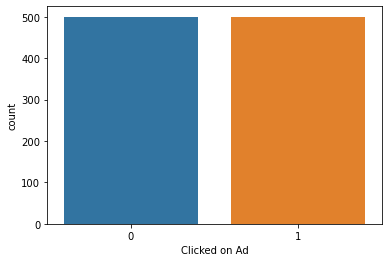

In [22]:
sns.countplot(x='Clicked on Ad',data=adv_data)

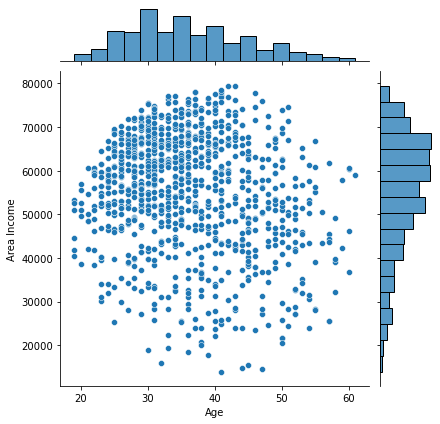

In [23]:
sns.jointplot(x='Age',y='Area Income',data=adv_data)

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

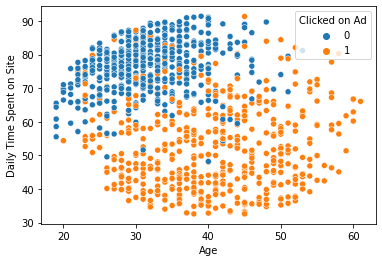

In [25]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',data=adv_data)

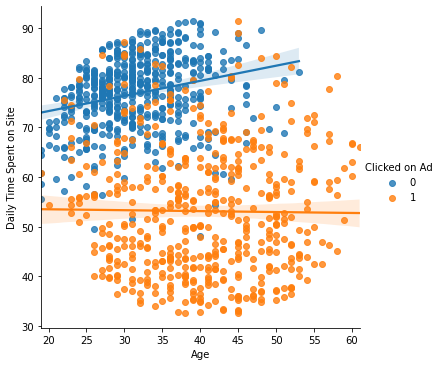

In [26]:
sns.lmplot(x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',data=adv_data)

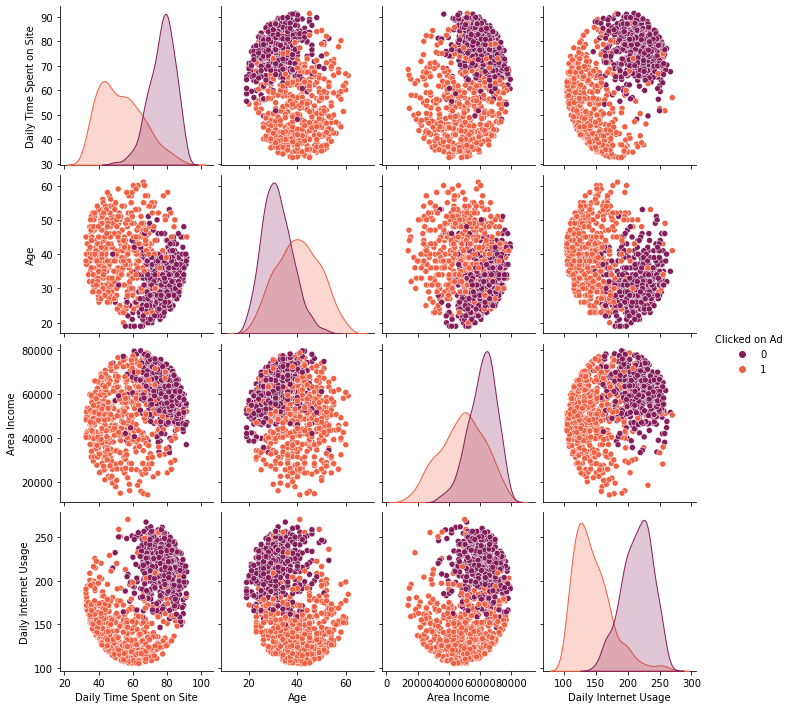

In [27]:
sns.pairplot(adv_data,hue='Clicked on Ad',vars=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'],palette='rocket')

<AxesSubplot:>

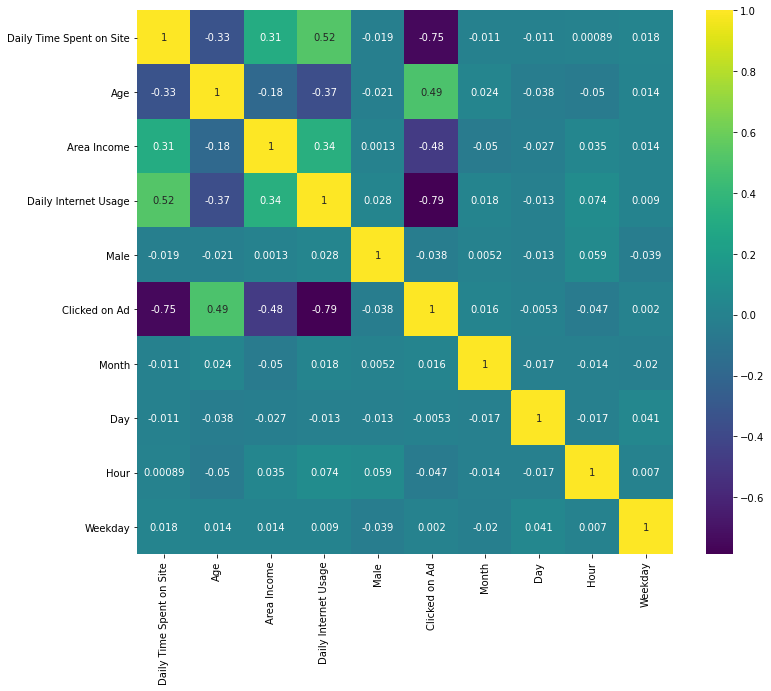

In [30]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(adv_data.corr(),cmap='viridis',annot=True)

In [31]:
#importing train test split from sklearn 
from sklearn.model_selection import train_test_split

In [59]:
X=adv_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y=adv_data['Clicked on Ad']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 5) (700,)
(300, 5) (300,)


In [61]:
#importing machine learning algorithm from sklearn family
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [72]:
prediction_value=logmodel.predict(X_test)

In [48]:
#classification values for the model
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,prediction_value))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [56]:
#importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

In [74]:
print(confusion_matrix(y_test,prediction_value))

[[149   8]
 [ 14 129]]


In [75]:
logmodel.coef_

array([[-5.12426791e-02,  2.36157646e-01, -9.89647744e-06,
        -2.46826887e-02,  1.07736310e-03]])

In [ ]:
#precision says 91% of predictions were correct
#model accuracy is 93% good model